In [1]:
import carla
import os

client_name = os.environ.get("CLIENT_NAME", "DOES NOT EXIST")
if client_name == "DOES NOT EXIST":
    raise Exception("The environment variable for the container name of the carla server has not been set")

# Connect to the client and retrieve the world object
client = carla.Client(client_name, 2000)
client.set_timeout(30)
world = client.get_world()

In [ ]:
for blueprint in world.get_blueprint_library().filter('*camera*'):
    print(blueprint)

In [ ]:
# Set synchronous mode settings
new_settings = world.get_settings()
new_settings.synchronous_mode = True
new_settings.fixed_delta_seconds = 0.02
world.apply_settings(new_settings) 

In [ ]:
# Set synchronous mode settings
new_settings = world.get_settings()
new_settings.synchronous_mode = False
new_settings.fixed_delta_seconds = None
world.apply_settings(new_settings) 

In [2]:
for actor in world.get_actors():
    if actor.is_alive:
      actor.destroy()

In [3]:
import random 
# Get the blueprint library and filter for the vehicle blueprints
vehicle_blueprints = world.get_blueprint_library().filter('vehicle.mini.cooper_s_2021')

# Get the map's spawn points
spawn_points = world.get_map().get_spawn_points()

ego_bp = random.choice(vehicle_blueprints)
ego_bp.set_attribute("role_name", "ego")

ego_vehicle = world.try_spawn_actor(ego_bp, random.choice(spawn_points))

In [ ]:
from timeit import default_timer
init_time = default_timer()
while(default_timer() - init_time < 15):
    world.tick()

In [4]:
# camera.destroy()
# Create a transform to place the camera on top of the vehicle
camera_init_trans = carla.Transform(carla.Location(x=0.5, z=2.5))

# We create the camera through a blueprint that defines its properties
# camera_bp = world.get_blueprint_library().find('sensor.camera.rgb')
camera_bp = world.get_blueprint_library().find('sensor.camera.rgb')
camera_bp.set_attribute('image_size_x', "300")
camera_bp.set_attribute('image_size_y', "300")
camera_bp.set_attribute('fov', "80")

# We spawn the camera and attach it to our ego vehicle
camera = world.spawn_actor(camera_bp, camera_init_trans, attach_to=ego_vehicle)

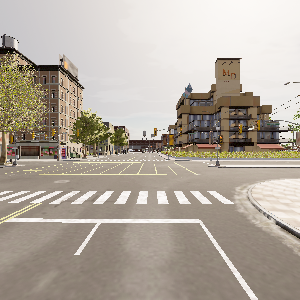

In [9]:
from PIL import Image
from IPython.display import display, clear_output
import numpy as np



# plt.ion()
# im1 = plt.imshow(np.zeros((300, 300, 3)))

def showCameraOutput(data):
    array = np.frombuffer(data.raw_data, dtype = np.dtype("uint8"))
    array = np.reshape(array, (data.height, data.width, 4))
    array = array[:, :, :3]
    array = array[:, :, ::-1]
    im = Image.fromarray(array)
    im.show()
    clear_output(wait=True)
    
    
camera.listen(lambda image: showCameraOutput(image))
from timeit import default_timer
init_time = default_timer()
ego_vehicle.set_autopilot(True)
while(default_timer() - init_time < 5):
    world.tick()
ego_vehicle.set_autopilot(False)
camera.stop()

In [ ]:
map = world.get_map()
waypoint01 = map.get_waypoint(ego_vehicle.get_location(),project_to_road=True, lane_type=(carla.LaneType.Driving))

In [ ]:
print(waypoint01.left_lane_marking.type)

In [ ]:
from time import sleep
ego_vehicle.set_autopilot(True)
sleep(1)
ego_vehicle.set_autopilot(False)

In [ ]:
import numpy as np
camera.listen(lambda image: image.save_to_disk('out/%06d.png' % image.frame))
from time import sleep
sleep(1)
camera.stop()

In [ ]:
# Set synchronous mode settings
new_settings = world.get_settings()
new_settings.synchronous_mode = True
new_settings.fixed_delta_seconds = 0.075
world.apply_settings(new_settings) 

from timeit import default_timer
init_time = default_timer()
ego_vehicle.set_autopilot(True)
while(default_timer() - init_time < 2):
    world.tick()
ego_vehicle.set_autopilot(True)

In [ ]:
ego_vehicle.set_autopilot(True)